# 1. Data Load

이제 제출을 해보겠습니다.

주어진 test데이터로 예측을 진행한 다음 sample_submission.csv에 예측한 값을 넣어보겠습니다.

앞서 train 셋에서 했던 동일한 전처리 과정을 거치되, data leakage가 발생하지 않도록 주의합니다.


In [28]:
import numpy as np
import pandas as pd
import os
import math

from scipy import stats #Analysis 
from scipy.stats import norm 

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [29]:
path = "./Dataset/"

test = pd.read_csv(path+"test.csv")
test

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD
0,0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,3.0,4.0,5.0,4.0,5.0,2.0,5.0,4.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0,4.0,CHL,9,114,243,2.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,1.0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,2.0,3,2.0,2.0,19,1.0,4.0,4.0,1.0,1.0,3.0,2.0
1,1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,1.0,5.0,5.0,4.0,5.0,USA,18,107,206,1.0,4.0,3.0,5.0,4.0,5.0,3.0,3.0,3.0,1.0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,2.0,2,1.0,1.0,33,1.0,1.0,5.0,2.0,1.0,5.0,2.0
2,2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,1.0,5.0,5.0,4.0,4.0,3.0,4.0,5.0,2.0,3.0,5.0,4.0,5.0,5.0,1.0,5.0,IDN,4,87,191,3.0,3.0,4.0,3.0,4.0,4.0,5.0,3.0,2.0,1.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,1,1,1.0,3,2.0,2.0,13,1.0,4.0,5.0,2.0,1.0,3.0,2.0
3,3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,3.0,2.0,2.0,3.0,4.0,5.0,5.0,4.0,1.0,1.0,4.0,4.0,4.0,4.0,AUS,2409,155,258,1.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,1.0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,2.0,2,1.0,1.0,28,1.0,2.0,2.0,2.0,1.0,3.0,2.0
4,4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,2.0,3.0,5.0,5.0,3.0,3.0,PHL,24,163,289,3.0,3.0,3.0,5.0,5.0,4.0,3.0,4.0,3.0,4.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,2.0,3,2.0,2.0,15,1.0,4.0,5.0,2.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,5.0,4.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,USA,10,200,254,3.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0,3.0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2.0,3,2.0,2.0,16,3.0,10.0,4.0,2.0,1.0,3.0,2.0
35448,35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,4.0,4.0,3.0,5.0,GBR,504,136,155,3.0,3.0,5.0,5.0,3.0,5.0,5.0,3.0,1.0,2.0,1,0,0,1,1,0,0,1,0,1,0,0,1,1,1,1,2.0,2,3.0,1.0,16,3.0,2.0,5.0,2.0,1.0,2.0,2.0
35449,35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,1.0,5.0,5.0,4.0,5.0,USA,27,121,191,1.0,5.0,4.0,3.0,4.0,3.0,3.0,5.0,2.0,1.0,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,1,3.0,3,1.0,1.0,31,1.0,1.0,5.0,1.0,1.0,2.0,2.0
35450,35450,5.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,CAN,3,58,105,3.0,5.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,2.0,3,1.0,1.0,19,1.0,12.0,1.0,2.0,1.0,NaN,2.0


# 2. Preprocessing 

In [30]:
# 원본 data와 따로 관리 -> original data = data, preprocessed data = processed_data 

# Feature drop : 'index'
processed_data = test.drop(['index'], axis=1).copy()

# Handling missing values 
# fill na with zero
fill_cols = ['country', 'education', 'gender', 'hand', 'religion', 'orientation', 'voted', 'married', 'ASD']
processed_data[fill_cols] = processed_data[fill_cols].fillna(0)
# removing missing values 
#processed_data =  processed_data.dropna(axis=0)

# Lable Encoding : 'country' 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
processed_data['country'] = le.fit_transform(list(processed_data['country']))   
#print(le.classes_)

# Log Transformation : 'introelapse','testelapse','surveyelapse'
right_skewed_cols = ['introelapse','testelapse','surveyelapse']
for c in right_skewed_cols : 
    processed_data[c] = np.log1p(processed_data[c])

# Ranging : 'age'
# 100s 나이대는 사실상 이상치라서 제거해도 될 것 같음..
bins= [0,10,20,30,40,50,60,70,80,90,100,40000]
labels = [0,10,20,30,40,50,60,70,80,90,100]
processed_data['age'] = pd.cut(processed_data['age'], bins=bins, labels=labels, right=False)

# Removing Outlier : 'age', 'familysize' 
# 13,544 rows x 69 cols
#out_index = processed_data[processed_data['age']==100].index
#processed_data = processed_data.drop(out_index).reset_index(drop=True)
#out_index = processed_data[processed_data['familysize']==2919.00].index -> 필요 없음!!! 

<AxesSubplot:>

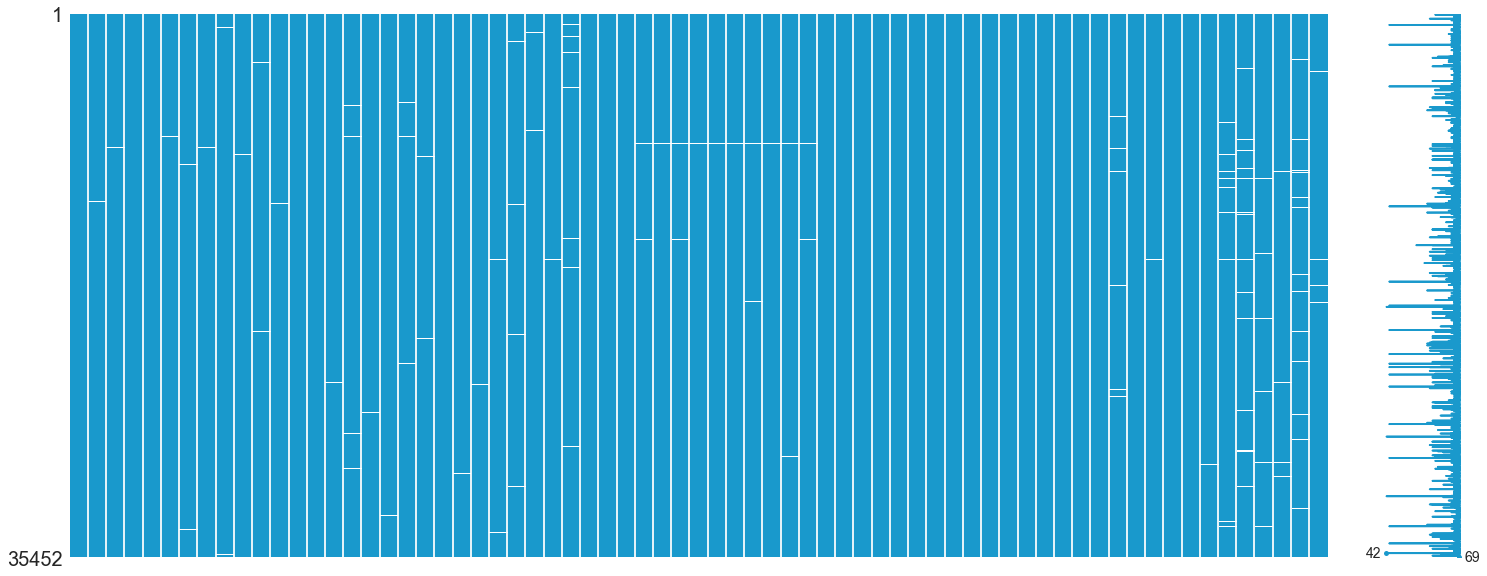

In [31]:
msno.matrix(test.iloc[:, :], color=(0.1, 0.6, 0.8))

In [32]:
processed_data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,3.0,4.0,5.0,4.0,5.0,2.0,5.0,4.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0,4.0,28,2.302585,4.744932,5.497168,2.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,1.0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,2.0,3,2.0,2.0,10,1.0,4.0,4.0,1.0,1.0,3.0,2.0
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,1.0,5.0,5.0,4.0,5.0,149,2.944439,4.682131,5.332719,1.0,4.0,3.0,5.0,4.0,5.0,3.0,3.0,3.0,1.0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,2.0,2,1.0,1.0,30,1.0,1.0,5.0,2.0,1.0,5.0,2.0
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,1.0,5.0,5.0,4.0,4.0,3.0,4.0,5.0,2.0,3.0,5.0,4.0,5.0,5.0,1.0,5.0,64,1.609438,4.477337,5.257495,3.0,3.0,4.0,3.0,4.0,4.0,5.0,3.0,2.0,1.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,1,1,1.0,3,2.0,2.0,10,1.0,4.0,5.0,2.0,1.0,3.0,2.0
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,3.0,2.0,2.0,3.0,4.0,5.0,5.0,4.0,1.0,1.0,4.0,4.0,4.0,4.0,9,7.787382,5.049856,5.556828,1.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,1.0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,2.0,2,1.0,1.0,20,1.0,2.0,2.0,2.0,1.0,3.0,2.0
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,2.0,3.0,5.0,5.0,3.0,3.0,117,3.218876,5.099866,5.669881,3.0,3.0,3.0,5.0,5.0,4.0,3.0,4.0,3.0,4.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,2.0,3,2.0,2.0,10,1.0,4.0,5.0,2.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,5.0,4.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,149,2.397895,5.303305,5.541264,3.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0,3.0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2.0,3,2.0,2.0,10,3.0,10.0,4.0,2.0,1.0,3.0,2.0
35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,4.0,4.0,3.0,5.0,49,6.224558,4.919981,5.049856,3.0,3.0,5.0,5.0,3.0,5.0,5.0,3.0,1.0,2.0,1,0,0,1,1,0,0,1,0,1,0,0,1,1,1,1,2.0,2,3.0,1.0,10,3.0,2.0,5.0,2.0,1.0,2.0,2.0
35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,1.0,5.0,5.0,4.0,5.0,149,3.332205,4.804021,5.257495,1.0,5.0,4.0,3.0,4.0,3.0,3.0,5.0,2.0,1.0,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,1,3.0,3,1.0,1.0,30,1.0,1.0,5.0,1.0,1.0,2.0,2.0
35450,5.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,26,1.386294,4.077537,4.663439,3.0,5.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,2.0,3,1.0,1.0,10,1.0,12.0,1.0,2.0,1.0,NaN,2.0


# 3. Model Load

In [41]:
from pycaret.classification import *

model = load_model(path+'Pycaret_XGB_0801_21_41') # you should fill out this part

prediction = predict_model(model, data=processed_data)
prediction.head()

Transformation Pipeline and Model Successfully Loaded


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,Label,Score
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,3.0,4.0,5.0,4.0,5.0,2.0,5.0,4.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0,4.0,28,2.302585,4.744932,5.497168,2.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,1.0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,2.0,3,2.0,2.0,10,1.0,4.0,4.0,1.0,1.0,3.0,2.0,1,0.5241
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,1.0,5.0,5.0,4.0,5.0,149,2.944439,4.682131,5.332719,1.0,4.0,3.0,5.0,4.0,5.0,3.0,3.0,3.0,1.0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,2.0,2,1.0,1.0,30,1.0,1.0,5.0,2.0,1.0,5.0,2.0,1,0.9231
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,1.0,5.0,5.0,4.0,4.0,3.0,4.0,5.0,2.0,3.0,5.0,4.0,5.0,5.0,1.0,5.0,64,1.609438,4.477337,5.257495,3.0,3.0,4.0,3.0,4.0,4.0,5.0,3.0,2.0,1.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,1,1,1.0,3,2.0,2.0,10,1.0,4.0,5.0,2.0,1.0,3.0,2.0,1,0.9472
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,3.0,2.0,2.0,3.0,4.0,5.0,5.0,4.0,1.0,1.0,4.0,4.0,4.0,4.0,9,7.787382,5.049856,5.556828,1.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,1.0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,2.0,2,1.0,1.0,20,1.0,2.0,2.0,2.0,1.0,3.0,2.0,1,0.6833
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,2.0,3.0,5.0,5.0,3.0,3.0,117,3.218876,5.099866,5.669881,3.0,3.0,3.0,5.0,5.0,4.0,3.0,4.0,3.0,4.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,2.0,3,2.0,2.0,10,1.0,4.0,5.0,2.0,1.0,2.0,2.0,1,0.8444


# 4. Submission

이제 학습한 모델을 사용하여 이 예측 결과를 submission.csv 파일로 만들어서 대회 페이지에 제출해보도록 합시다.

제출한 뒤 리더보드를 통해 결과를 확인합시다

In [42]:
# 제출용 sample 파일을 불러옵니다.
submission = pd.read_csv(path + 'sample_submission.csv')
submission.head()

,index,nerdiness
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1


In [43]:
# 위에서 구한 예측값을 그대로 넣어줍니다.
submission['nerdiness'] = prediction['Label']

# 데이터가 잘 들어갔는지 확인합니다.
submission

,index,nerdiness
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
35447,35447,1
35448,35448,1
35449,35449,1
35450,35450,1


In [45]:
import datetime
filename = datetime.datetime.now().strftime("%m%d_%H_%M_%S")
filename

'0801_21_43_06'

In [46]:
submission.to_csv(path+"{}.csv".format(filename), index=False)